### Requirements:
Gene_expression.csv

Build a model to predict ‘BM_label’. The goal is to get high specificity at 90% sensitivity (meaning at least 90% of M is correctly classified as M).

Provide Jupyter notebook python code consist of:<br>
(1) A summary of the model building process – feature engineering, models tested, parameter tuning method … etc<br>
(2) A table of cross-validated performance metrics: AUC, specificity at sensitivity 90%, corresponding cutoff<br>
(3) Plots help to understand the performance and challenging (i.e., misclassified) samples or subtypes<br>

In [1]:
import numpy as np  # numerical operations and array manipulation
import pandas as pd  # data manipulation and analysis using DataFrames
import matplotlib.pyplot as plt  # creating visualizations and plots
import seaborn as sns  # enhanced data visualization based on Matplotlib

# Import data preprocessing libraries  from scikit-learn
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Import various classifiers from scikit-learn
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Import evaluation metrics and tools from scikit-learn
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

# Data Preprocessing

    [1] Encoding categorical features
    [2] Data splitting
    [3] Data normalization
    [4] Feature engineering

In [2]:
df = pd.read_csv("gene_expression.csv")
df

,sampleid,BM_label,Subtype_label,Gexp_1,Gexp_2,Gexp_3,Gexp_4,Gexp_5,Gexp_6,Gexp_7,...,Gexp_280,Gexp_281,Gexp_282,Gexp_283,Gexp_284,Gexp_285,Gexp_286,Gexp_287,Gexp_288,Gexp_289
0,BFN_1,B,BFN,2.012434,6.475739,7.403382,5.079842,6.661414,11.420208,5.697739,...,11.902200,7.346017,10.707870,7.080375,8.287987,7.507218,7.156346,6.000984,7.817179,7.302311
1,BFN_2,B,BFN,4.325741,9.022011,6.324592,3.856342,6.781965,15.406112,4.908473,...,10.422510,5.935734,8.212138,7.856388,5.858044,8.980339,12.761671,5.585948,7.648573,6.853544
2,BFN_3,B,BFN,5.215917,5.643612,6.382952,3.576874,5.105527,12.934769,5.786740,...,12.692533,7.077989,6.680264,6.319670,5.872043,6.680947,7.189723,7.127622,8.516764,8.129248
3,BFN_4,B,BFN,3.416560,7.975687,5.887156,7.928302,5.476066,15.321428,6.571551,...,10.237433,5.682980,7.351598,6.103229,5.138584,7.158227,9.593462,7.622466,8.359069,7.720262
4,BFN_5,B,BFN,3.590157,5.804780,4.327424,5.267657,7.317374,9.534488,5.015600,...,9.954924,7.577532,7.939585,7.829138,5.272358,8.287598,11.172290,6.945891,8.536443,7.115096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,PTC_86,M,PTC,10.896052,10.985021,4.833854,10.941094,6.504435,17.984471,11.788283,...,10.622111,8.302770,7.847590,7.777855,7.204303,6.462131,8.038932,6.717445,8.313039,7.261073
369,PTC_87,M,PTC,9.880799,11.874632,10.194632,11.332451,15.989713,19.081560,11.966844,...,8.543659,9.570367,8.351480,8.117534,4.601996,6.949445,7.962863,4.701641,5.401700,7.195871
370,PTC_88,M,PTC,10.372918,12.899358,11.155699,11.427322,15.813717,17.110904,12.079359,...,10.075108,9.933159,6.143567,7.809183,4.400762,8.602916,12.123991,8.576006,4.181249,7.163329
371,PTC_89,M,PTC,8.511521,10.209369,8.270140,8.386923,13.336672,18.035924,10.747792,...,12.016643,8.050255,7.982679,5.874362,3.663149,7.458423,9.271925,5.122277,6.569358,8.837589


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Columns: 292 entries, sampleid to Gexp_289
dtypes: float64(289), object(3)
memory usage: 851.0+ KB


In [4]:
df.describe()

,Gexp_1,Gexp_2,Gexp_3,Gexp_4,Gexp_5,Gexp_6,Gexp_7,Gexp_8,Gexp_9,Gexp_10,...,Gexp_280,Gexp_281,Gexp_282,Gexp_283,Gexp_284,Gexp_285,Gexp_286,Gexp_287,Gexp_288,Gexp_289
count,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,...,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000
mean,5.220338,8.543680,7.023233,6.613395,9.548460,14.237106,8.206609,9.149451,9.792955,4.114692,...,8.979014,8.069654,7.387729,6.986057,5.568394,8.097487,9.487855,6.296203,7.001725,7.422920
std,2.584016,2.205945,1.975257,2.425590,3.781457,2.902482,2.789343,1.900677,1.213039,1.536657,...,2.134195,1.387228,1.483865,0.862206,1.398993,1.278960,1.945985,2.100125,1.518127,0.913469
min,0.948371,4.388351,2.665895,1.822940,2.776294,7.641338,1.904336,4.200353,7.081345,1.313477,...,3.396402,5.215268,3.899578,4.997992,1.167175,5.390678,5.579840,1.576340,3.304213,4.986666
25%,3.572215,6.862753,5.544002,4.848045,6.414145,11.860528,6.060000,7.833941,8.913499,3.273019,...,7.423858,7.042447,6.269148,6.357162,4.647088,7.096665,8.073159,4.677524,5.878335,6.841792
50%,4.420457,8.230746,6.715680,5.745848,9.253356,14.451723,7.969846,8.982676,9.623506,3.956139,...,9.139942,7.719975,7.442118,6.889169,5.447228,7.908677,9.083452,6.175875,7.119171,7.332398
75%,5.588232,9.560548,8.224197,8.214554,12.420394,16.586752,10.476533,10.452533,10.581003,4.568725,...,10.660994,8.981470,8.327504,7.478986,6.412315,9.036079,10.702695,7.653110,8.108806,7.952274
max,13.169441,14.026184,12.675308,12.680860,18.034731,20.144063,13.955306,14.410161,13.888173,12.366771,...,13.510996,12.420013,12.260645,10.246642,9.597007,11.251926,14.575717,11.990476,10.928195,10.386541


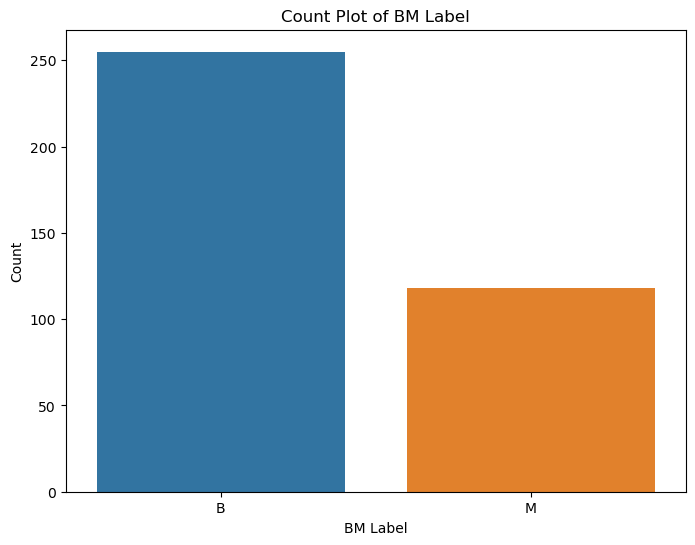

In [5]:
# Create the Count plot
plt.figure(figsize=(8, 6))  # Set the size of the figure
sns.countplot(data=df, x='BM_label')

# Customize the plot
plt.title("Count Plot of BM Label")
plt.xlabel("BM Label")
plt.ylabel("Count")
# Show the plot
plt.show()

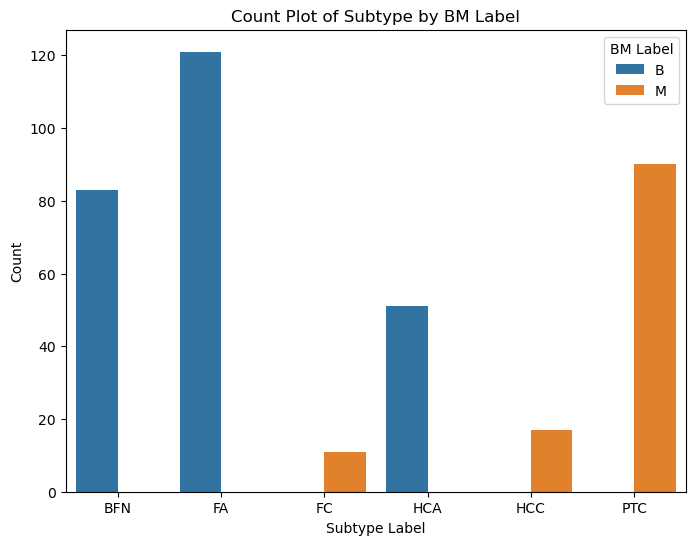

In [6]:
# Create the Count plot
plt.figure(figsize=(8, 6))  # Set the size of the figure
sns.countplot(data=df, x='Subtype_label', hue='BM_label')

# Customize the plot
plt.title("Count Plot of Subtype by BM Label")
plt.xlabel("Subtype Label")
plt.ylabel("Count")
plt.legend(title='BM Label')
# Show the plot
plt.show()

### Encode Categorical Features

__Label Encoding:__

Label encoding is a method used to convert categorical data into numerical form. It's particularly useful when dealing with ordinal categorical variables, where there's a meaningful order among the categories. Each category is assigned a unique numerical label, allowing machine learning algorithms to work with this data.

In [7]:
# Encode categorical variables using LabelEncoder
subtype_encoder = LabelEncoder()
df['Subtype_label'] = subtype_encoder.fit_transform(df['Subtype_label'])

# Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()
df['BM_label'] = label_encoder.fit_transform(df['BM_label'])

df

,sampleid,BM_label,Subtype_label,Gexp_1,Gexp_2,Gexp_3,Gexp_4,Gexp_5,Gexp_6,Gexp_7,...,Gexp_280,Gexp_281,Gexp_282,Gexp_283,Gexp_284,Gexp_285,Gexp_286,Gexp_287,Gexp_288,Gexp_289
0,BFN_1,0,0,2.012434,6.475739,7.403382,5.079842,6.661414,11.420208,5.697739,...,11.902200,7.346017,10.707870,7.080375,8.287987,7.507218,7.156346,6.000984,7.817179,7.302311
1,BFN_2,0,0,4.325741,9.022011,6.324592,3.856342,6.781965,15.406112,4.908473,...,10.422510,5.935734,8.212138,7.856388,5.858044,8.980339,12.761671,5.585948,7.648573,6.853544
2,BFN_3,0,0,5.215917,5.643612,6.382952,3.576874,5.105527,12.934769,5.786740,...,12.692533,7.077989,6.680264,6.319670,5.872043,6.680947,7.189723,7.127622,8.516764,8.129248
3,BFN_4,0,0,3.416560,7.975687,5.887156,7.928302,5.476066,15.321428,6.571551,...,10.237433,5.682980,7.351598,6.103229,5.138584,7.158227,9.593462,7.622466,8.359069,7.720262
4,BFN_5,0,0,3.590157,5.804780,4.327424,5.267657,7.317374,9.534488,5.015600,...,9.954924,7.577532,7.939585,7.829138,5.272358,8.287598,11.172290,6.945891,8.536443,7.115096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,PTC_86,1,5,10.896052,10.985021,4.833854,10.941094,6.504435,17.984471,11.788283,...,10.622111,8.302770,7.847590,7.777855,7.204303,6.462131,8.038932,6.717445,8.313039,7.261073
369,PTC_87,1,5,9.880799,11.874632,10.194632,11.332451,15.989713,19.081560,11.966844,...,8.543659,9.570367,8.351480,8.117534,4.601996,6.949445,7.962863,4.701641,5.401700,7.195871
370,PTC_88,1,5,10.372918,12.899358,11.155699,11.427322,15.813717,17.110904,12.079359,...,10.075108,9.933159,6.143567,7.809183,4.400762,8.602916,12.123991,8.576006,4.181249,7.163329
371,PTC_89,1,5,8.511521,10.209369,8.270140,8.386923,13.336672,18.035924,10.747792,...,12.016643,8.050255,7.982679,5.874362,3.663149,7.458423,9.271925,5.122277,6.569358,8.837589


### Data Splitting [into X_train, X_test, y_train, y_test]

Data splitting is a crucial step in machine learning. It involves dividing a dataset into two parts: training data, used to teach the model, and testing data, kept unseen to evaluate the model's performance on new information.

    - Training Data: This part trains the model. It contains input features and corresponding target labels. The model learns patterns and relationships from this data.

    - Testing Data: This part assesses the model's performance. It's unseen during training and contains only input features. The model's predictions are compared with true labels to measure its effectiveness.

Common methods include:

Train-Test Split: Divides data into training and testing sets (e.g., 80-20%). The model learns from the training set and is tested on the separate test set.
Data splitting helps prevent overfitting and gauges how well the model generalizes to new data.

In [8]:
X = df.drop(['sampleid', 'BM_label'], axis=1)
y = df['BM_label']

In [9]:
X

,Subtype_label,Gexp_1,Gexp_2,Gexp_3,Gexp_4,Gexp_5,Gexp_6,Gexp_7,Gexp_8,Gexp_9,...,Gexp_280,Gexp_281,Gexp_282,Gexp_283,Gexp_284,Gexp_285,Gexp_286,Gexp_287,Gexp_288,Gexp_289
0,0,2.012434,6.475739,7.403382,5.079842,6.661414,11.420208,5.697739,7.942475,8.867197,...,11.902200,7.346017,10.707870,7.080375,8.287987,7.507218,7.156346,6.000984,7.817179,7.302311
1,0,4.325741,9.022011,6.324592,3.856342,6.781965,15.406112,4.908473,9.008780,10.263855,...,10.422510,5.935734,8.212138,7.856388,5.858044,8.980339,12.761671,5.585948,7.648573,6.853544
2,0,5.215917,5.643612,6.382952,3.576874,5.105527,12.934769,5.786740,8.566084,9.258508,...,12.692533,7.077989,6.680264,6.319670,5.872043,6.680947,7.189723,7.127622,8.516764,8.129248
3,0,3.416560,7.975687,5.887156,7.928302,5.476066,15.321428,6.571551,9.708258,9.557745,...,10.237433,5.682980,7.351598,6.103229,5.138584,7.158227,9.593462,7.622466,8.359069,7.720262
4,0,3.590157,5.804780,4.327424,5.267657,7.317374,9.534488,5.015600,9.482265,9.058336,...,9.954924,7.577532,7.939585,7.829138,5.272358,8.287598,11.172290,6.945891,8.536443,7.115096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,5,10.896052,10.985021,4.833854,10.941094,6.504435,17.984471,11.788283,13.460677,12.165832,...,10.622111,8.302770,7.847590,7.777855,7.204303,6.462131,8.038932,6.717445,8.313039,7.261073
369,5,9.880799,11.874632,10.194632,11.332451,15.989713,19.081560,11.966844,12.410110,12.995302,...,8.543659,9.570367,8.351480,8.117534,4.601996,6.949445,7.962863,4.701641,5.401700,7.195871
370,5,10.372918,12.899358,11.155699,11.427322,15.813717,17.110904,12.079359,11.276903,12.037212,...,10.075108,9.933159,6.143567,7.809183,4.400762,8.602916,12.123991,8.576006,4.181249,7.163329
371,5,8.511521,10.209369,8.270140,8.386923,13.336672,18.035924,10.747792,11.441295,11.653355,...,12.016643,8.050255,7.982679,5.874362,3.663149,7.458423,9.271925,5.122277,6.569358,8.837589


In [10]:
y

0      0
1      0
2      0
3      0
4      0
      ..
368    1
369    1
370    1
371    1
372    1
Name: BM_label, Length: 373, dtype: int64

In [11]:
# Step 2: Split data into training and testing sets (optional)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Data Normalization

Data normalization is the process of transforming numerical data to a common scale. It ensures that features have similar magnitudes, preventing certain variables from dominating others. This aids machine learning algorithms in converging faster and being less sensitive to the scale of input features.

In [12]:
# Data preprocessing: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Cross Validation

Cross-validation is a technique used to assess the performance of machine learning models. It involves dividing the dataset into multiple subsets or "folds." The model is trained on a subset and tested on the remaining data. This process is repeated, with each fold serving as both training and test data. Cross-validation provides a more robust evaluation of a model's generalization ability and helps detect overfitting.

In [13]:
# Define functions to calculate specificity, sensitivity, and corresponding cutoff
def get_specificity_sensitivity(y_true, y_pred):
    """
    Calculate specificity and sensitivity given true labels and predicted labels.
    
    Parameters:
    y_true (array-like): True labels.
    y_pred (array-like): Predicted labels.
    
    Returns:
    specificity (float): Specificity score.
    sensitivity (float): Sensitivity score.
    """
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = (tn / (tn + fp))
    sensitivity = (tp / (tp + fn))
    return (specificity, sensitivity)

def find_corresponding_cutoff(y_true, y_pred, sensitivity_threshold=0.9):
    """
    Find the corresponding cutoff value for a given sensitivity threshold using ROC curve.
    
    Parameters:
    y_true (array-like): True labels.
    y_pred (array-like): Predicted labels or scores.
    sensitivity_threshold (float): Desired sensitivity threshold (default is 0.9).
    
    Returns:
    corresponding_cutoff (float): Cutoff value corresponding to the specified sensitivity threshold.
    """
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    corresponding_cutoff = thresholds[np.argmax(tpr >= sensitivity_threshold)]
    return corresponding_cutoff

In [14]:
# Models to consider
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'kNN': KNeighborsClassifier(),
    'Gaussian NB': GaussianNB(),
    'MLP Classifier': MLPClassifier(random_state=42),
    'LDA': LinearDiscriminantAnalysis()
}

# Cross-validation using StratifiedKFold (for balanced classes)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [15]:
# Initialize the table
table = []

# Perform cross-validation for each model
for model_name, model in models.items():
    y_scores = cross_val_predict(model, X_train_scaled, y_train, cv=cv, method='predict')
    
    # Calculate the AUC, specificity at 90% sensitivity, and corresponding cutoff
    auc = roc_auc_score(y_train, y_scores)
    specificity, sensitivity = get_specificity_sensitivity(y_train, y_scores)
    cutoff = find_corresponding_cutoff(y_train, y_scores)
    
    # Calculate additional metrics
    y_pred_labels = (y_scores >= cutoff).astype(int)
    accuracy = accuracy_score(y_train, y_pred_labels)
    precision = precision_score(y_train, y_pred_labels)
    f1 = f1_score(y_train, y_pred_labels)
    recall = recall_score(y_train, y_pred_labels)
    
    table.append([model_name, auc, specificity, sensitivity, cutoff, accuracy, precision, f1, recall])

# Print the table header
print("{:<20} {:<11} {:<11} {:<11} {:<11} {:<11} {:<11} {:<11} {:<11}".format(
    "Model Name", "AUC", "Specificity", "Sensitivity", "Cutoff", "Accuracy", "Precision", "F1Score", "Recall"))
# Print the separator line
print("-" * 115)

# Print the table rows
for row in table:
    model_name, auc, specificity, sensitivity, cutoff, accuracy, precision, f1, recall = row
    print("{:<20} {:<11.4f} {:<11.4f} {:<11.4f} {:<11.4f} {:<11.4f} {:<11.4f} {:<11.4f} {:<11.4f}".format(
        model_name, auc, specificity, sensitivity, cutoff, accuracy, precision, f1, recall))

Model Name           AUC         Specificity Sensitivity Cutoff      Accuracy    Precision   F1Score     Recall     
-------------------------------------------------------------------------------------------------------------------
Logistic Regression  0.8915      0.9749      0.8081      0.0000      0.3322      0.3322      0.4987      1.0000     
Decision Tree        0.9596      0.9799      0.9394      1.0000      0.9664      0.9588      0.9490      0.9394     
SVM                  0.8586      1.0000      0.7172      0.0000      0.3322      0.3322      0.4987      1.0000     
Random Forest        0.8889      1.0000      0.7778      0.0000      0.3322      0.3322      0.4987      1.0000     
Gradient Boosting    1.0000      1.0000      1.0000      1.0000      1.0000      1.0000      1.0000      1.0000     
kNN                  0.8611      0.9950      0.7273      0.0000      0.3322      0.3322      0.4987      1.0000     
Gaussian NB          0.8737      1.0000      0.7475      0.0000  

### Feature Engineering

Feature engineering is the process of selecting, transforming, or creating new features from raw data to enhance a machine learning model's performance. It involves extracting relevant information, reducing noise, and improving the representation of data. Effective feature engineering can significantly impact a model's accuracy and predictive power, ultimately leading to better outcomes.

In [16]:
# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt_classifier.fit(X, y)

# Get feature importances
feature_importances = dt_classifier.feature_importances_

# Create a DataFrame to store feature importances with corresponding feature names
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
0,Subtype_label,0.869281
209,Gexp_209,0.034566
172,Gexp_172,0.031856
93,Gexp_93,0.027547
117,Gexp_117,0.016138
...,...,...
104,Gexp_104,0.000000
105,Gexp_105,0.000000
106,Gexp_106,0.000000
107,Gexp_107,0.000000


In [17]:
selected_features = list(feature_importance_df[feature_importance_df['Importance'] != 0.0]['Feature'])
print(selected_features)

['Subtype_label', 'Gexp_209', 'Gexp_172', 'Gexp_93', 'Gexp_117', 'Gexp_142', 'Gexp_40', 'Gexp_67']


In [18]:
# Train a model using the selected features
selected_X_train = X_train[selected_features]
selected_X_test = X_test[selected_features]

### Hyperparameter Tuning

Hyperparameter tuning involves fine-tuning the parameters of a machine learning algorithm that are not learned during training (unlike model parameters). These hyperparameters influence how the model learns and generalizes. By experimenting with different values, data scientists aim to optimize the model's performance. Techniques like grid search and random search are commonly used to systematically explore the hyperparameter space and find the best combination for optimal results.

In [19]:
# Define the hyperparameters and their possible values
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(selected_X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Accuracy: 0.9899435028248588


### Model Building

Model building is the core of machine learning, where data is used to train algorithms to make predictions or classifications. It involves selecting an appropriate algorithm, preparing data, and tuning hyperparameters. Model building aims to create a reliable representation of relationships within the data. Successful model building requires a deep understanding of algorithms, feature engineering, and performance evaluation to achieve accurate and meaningful predictions.

Model Accuracy: 1.0


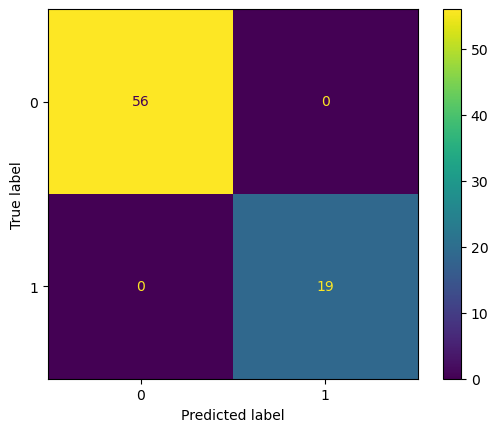

In [20]:
# Specify the hyperparameters
hyperparameters = {
    'criterion': 'entropy',
    'max_depth': None,
    'min_samples_leaf': 2,
    'min_samples_split': 2,
    'random_state': 42
}

# Create the DecisionTreeClassifier with the specified hyperparameters
model = DecisionTreeClassifier(**hyperparameters)

# fit the model
model.fit(selected_X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(selected_X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Model Accuracy:", accuracy)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=model.classes_)
disp.plot()
plt.show()

In [21]:
# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        19

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



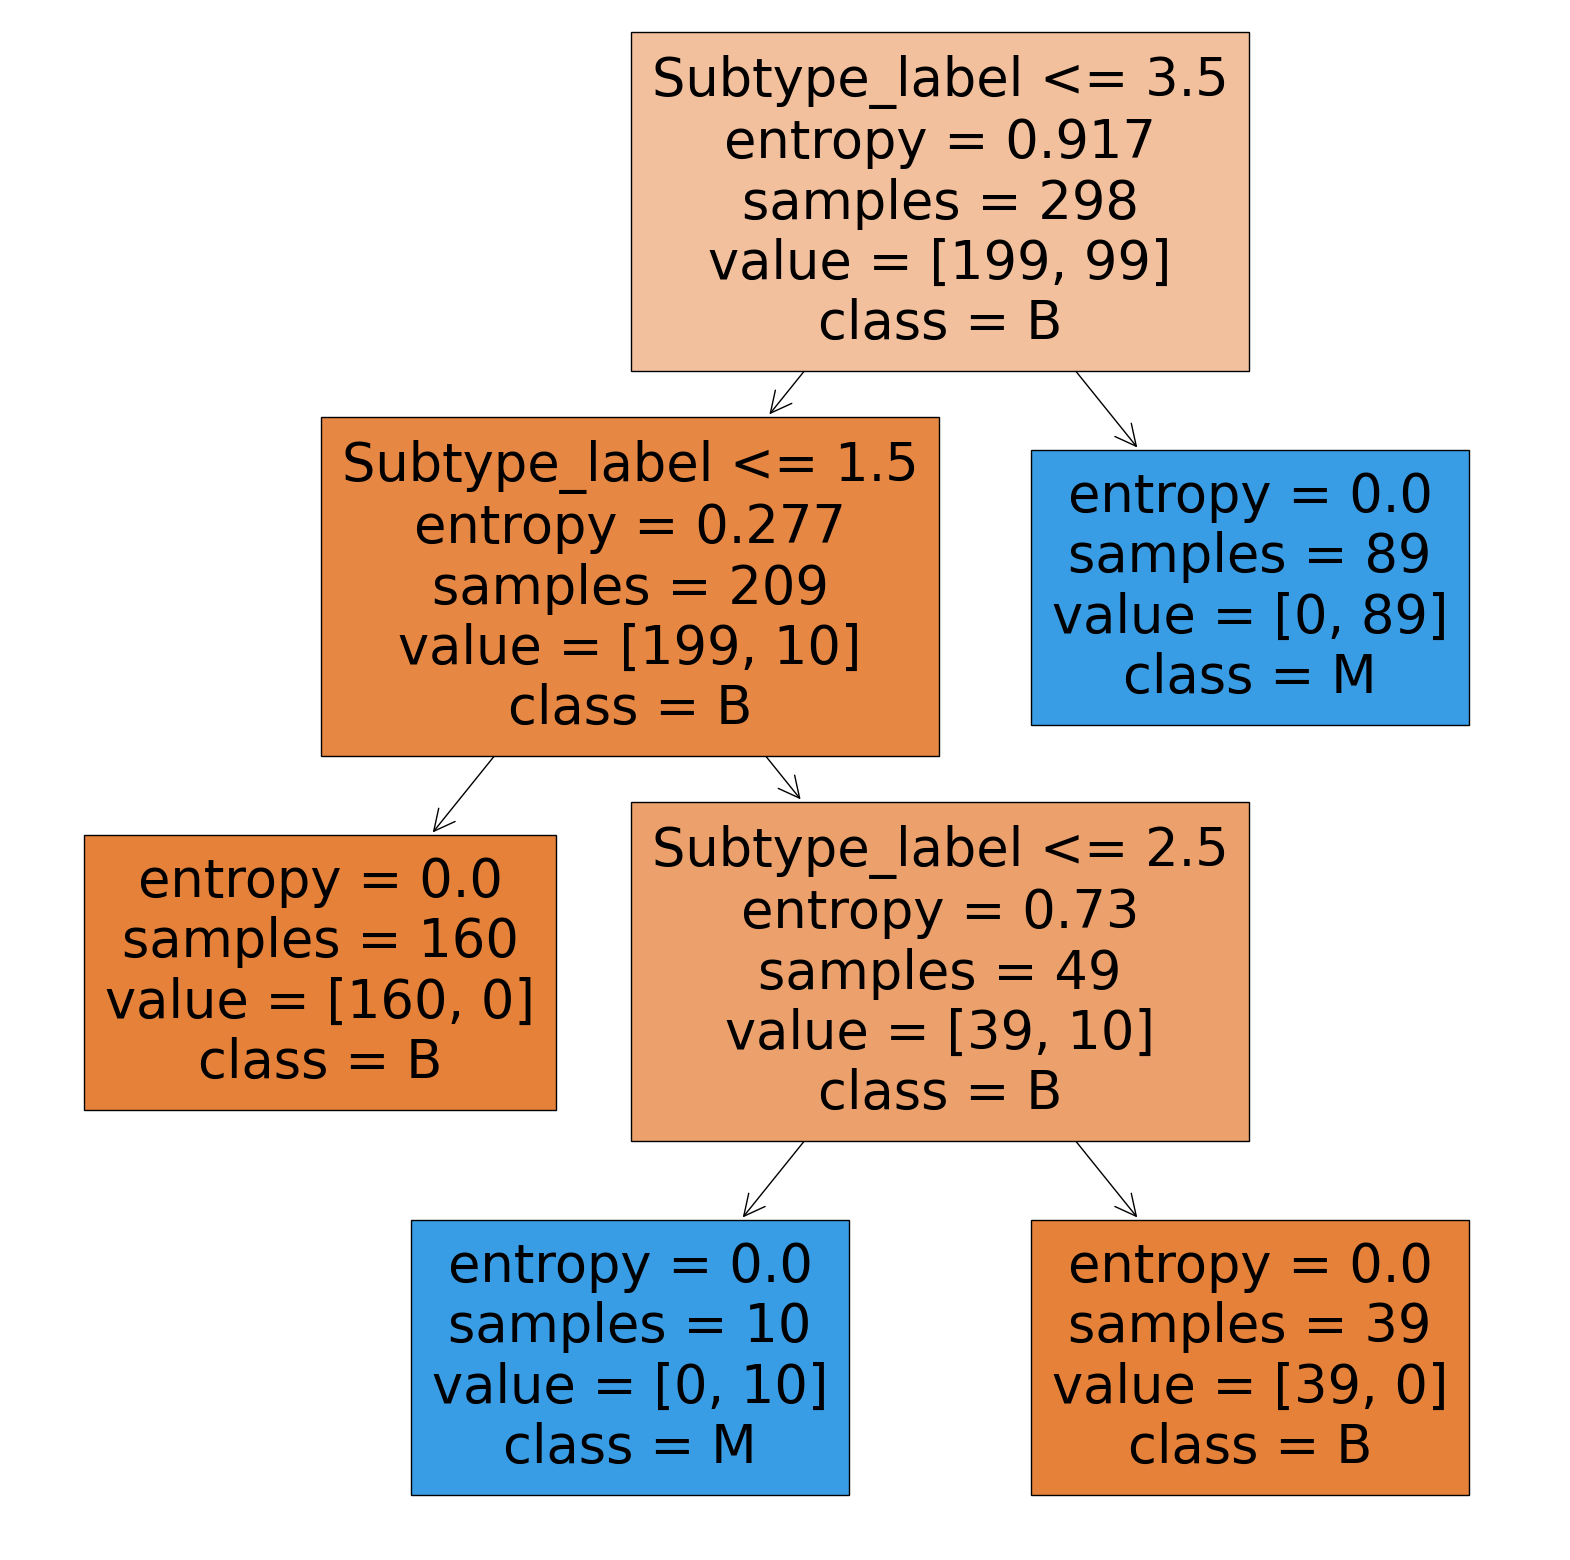

In [22]:
# Visualize the decision tree
plt.figure(figsize=(20, 20))
tree.plot_tree(model, feature_names=list(model.feature_names_in_),
               class_names=list(label_encoder.inverse_transform(model.classes_)),
               filled=True)
plt.show()